# Import Packages

In [18]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
# Set this to True to reduce the training images, and reduce the training time.
TRAINING_SET_SUBSAMPLE_ENABLED = True

# Import dataset

In [20]:
(train_images1, train_labels1), (test_images1, test_labels1) = datasets.cifar10.load_data() # Load dataset
if not TRAINING_SET_SUBSAMPLE_ENABLED:
    training_limit = 50_000
    testing_limit = 10_000

else:
    training_limit = 25_000
    testing_limit = 5_000

train_images = train_images1[0:training_limit]
train_labels = train_labels1[0:training_limit]
test_images = test_images1[0:testing_limit]
test_labels = test_labels1[0:testing_limit]
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
    

(25000, 32, 32, 3)
(25000, 1)
(5000, 32, 32, 3)
(5000, 1)


# Create the class identifiers and plot an example

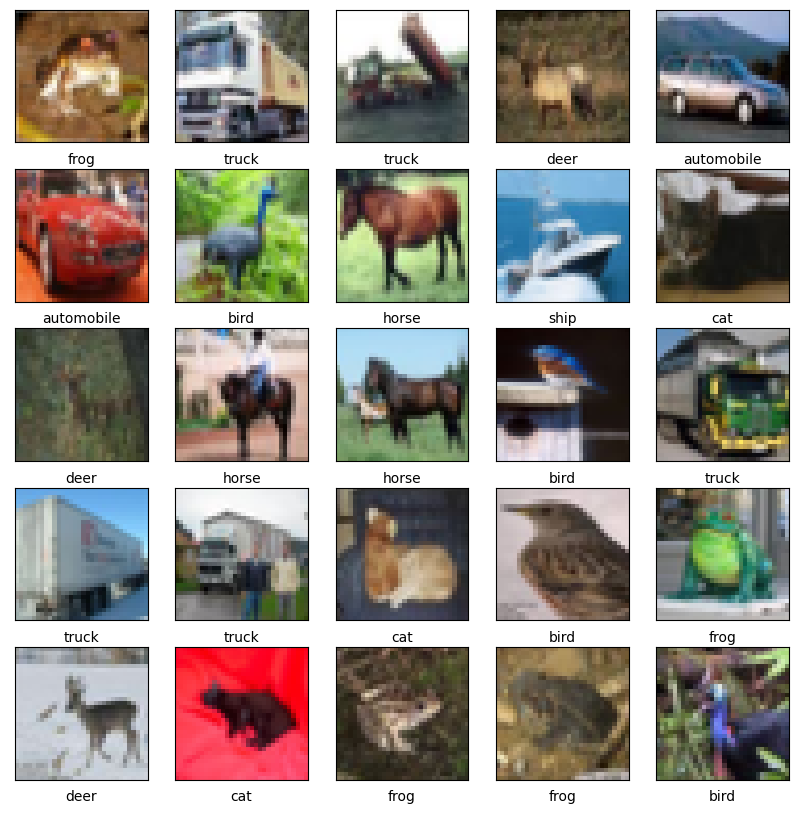

In [21]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images1[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels1[i][0]])
plt.show()

# Convert Images into float type

In [22]:
num_classes = 10
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Scaling (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One-hot encoding the target class (labels)
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Build the Modified CNN and configure its layers

In [23]:
# Creating a Convolutional Neural Network (CNN)
model = Sequential()

# block 1
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3)) # randomly drop out neurons to increase randomness, variablity, and generalization of the output.

# block 2
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5)) # randomly drop out neurons to increase randomness, variablity, and generalization of the output.

# block 3
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5)) # randomly drop out neurons to increase randomness, variablity, and generalization of the output.

# block 4
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5)) # randomly drop out neurons to increase randomness, variablity, and generalization of the output.
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

# Train the Neural Network

In [24]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy']) # Compiling
print("\nTraining starts")
history = model.fit(train_images, train_labels, batch_size=64, epochs=25, validation_split = 0.2)    # Training
print("Training ends")

print("\nTesting starts")
scores=model.evaluate(test_images, test_labels)             # Testing
print("Testing ends\n")
print("Testing Accuracy: ", scores[1])


Training starts
Epoch 1/25


2023-02-10 15:09:28.724941: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 12s 24ms/step - loss: 2.0981 - accuracy: 0.3207 - val_loss: 3.4802 - val_accuracy: 0.1054
Epoch 2/25
313/313 [==============================] - 7s 22ms/step - loss: 1.5204 - accuracy: 0.4526 - val_loss: 2.1318 - val_accuracy: 0.3560
Epoch 3/25
313/313 [==============================] - 7s 22ms/step - loss: 1.3106 - accuracy: 0.5317 - val_loss: 1.3492 - val_accuracy: 0.5108
Epoch 4/25
313/313 [==============================] - 7s 23ms/step - loss: 1.1822 - accuracy: 0.5789 - val_loss: 1.2438 - val_accuracy: 0.5702
Epoch 5/25
313/313 [==============================] - 7s 23ms/step - loss: 1.0745 - accuracy: 0.6191 - val_loss: 1.1040 - val_accuracy: 0.6094
Epoch 6/25
313/313 [==============================] - 7s 23ms/step - loss: 0.9995 - accuracy: 0.6482 - val_loss: 0.8931 - val_accuracy: 0.6816
Epoch 7/25
313/313 [==============================] - 7s 23ms/step - loss: 0.9358 - accuracy: 0.6735 - val_loss: 0.8567 - val_accuracy: 0.6964
Epoch 8/2

Text(0.5, 1.0, 'Loss Curves')

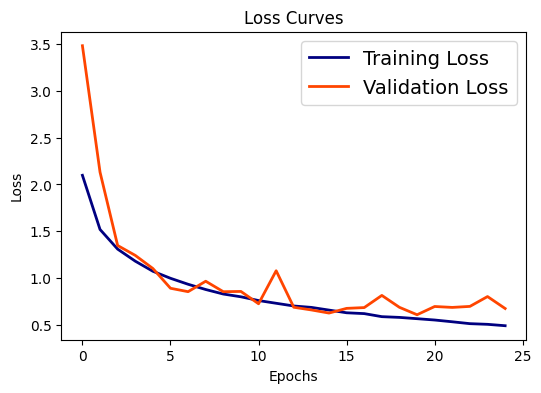

In [28]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'navy', linewidth=2.0)
plt.plot(history.history['val_loss'], 'orangered', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

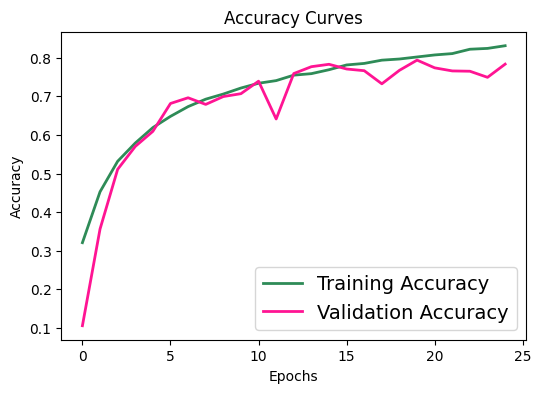

In [29]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'seagreen', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'deeppink', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

157/157 [==============================] - 1s 4ms/step


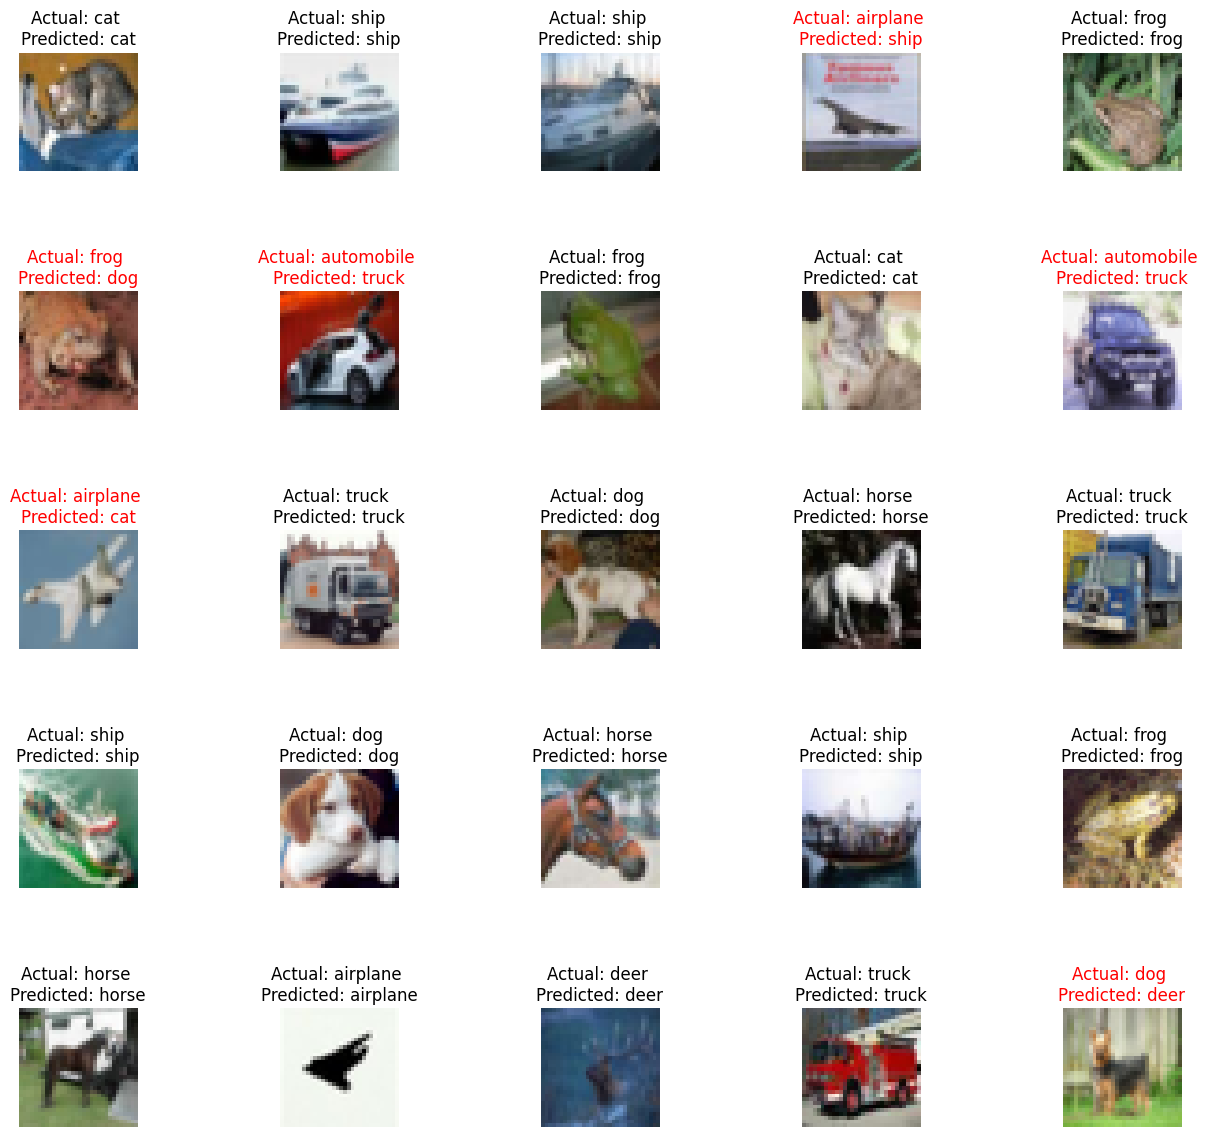

In [30]:
# Making the Predictions
pred = model.predict(test_images)
pred_classes = np.argmax(pred, axis=1)

# Plotting the Actual vs. Predicted results
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    if class_names[np.argmax(test_labels[i])]==class_names[pred_classes[i]]:
     axes[i].set_title("Actual: %s \nPredicted: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    else:
     axes[i].set_title("Actual: %s \nPredicted: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]), color='red')
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1.2)

1/1 [==============================] - 0s 141ms/step


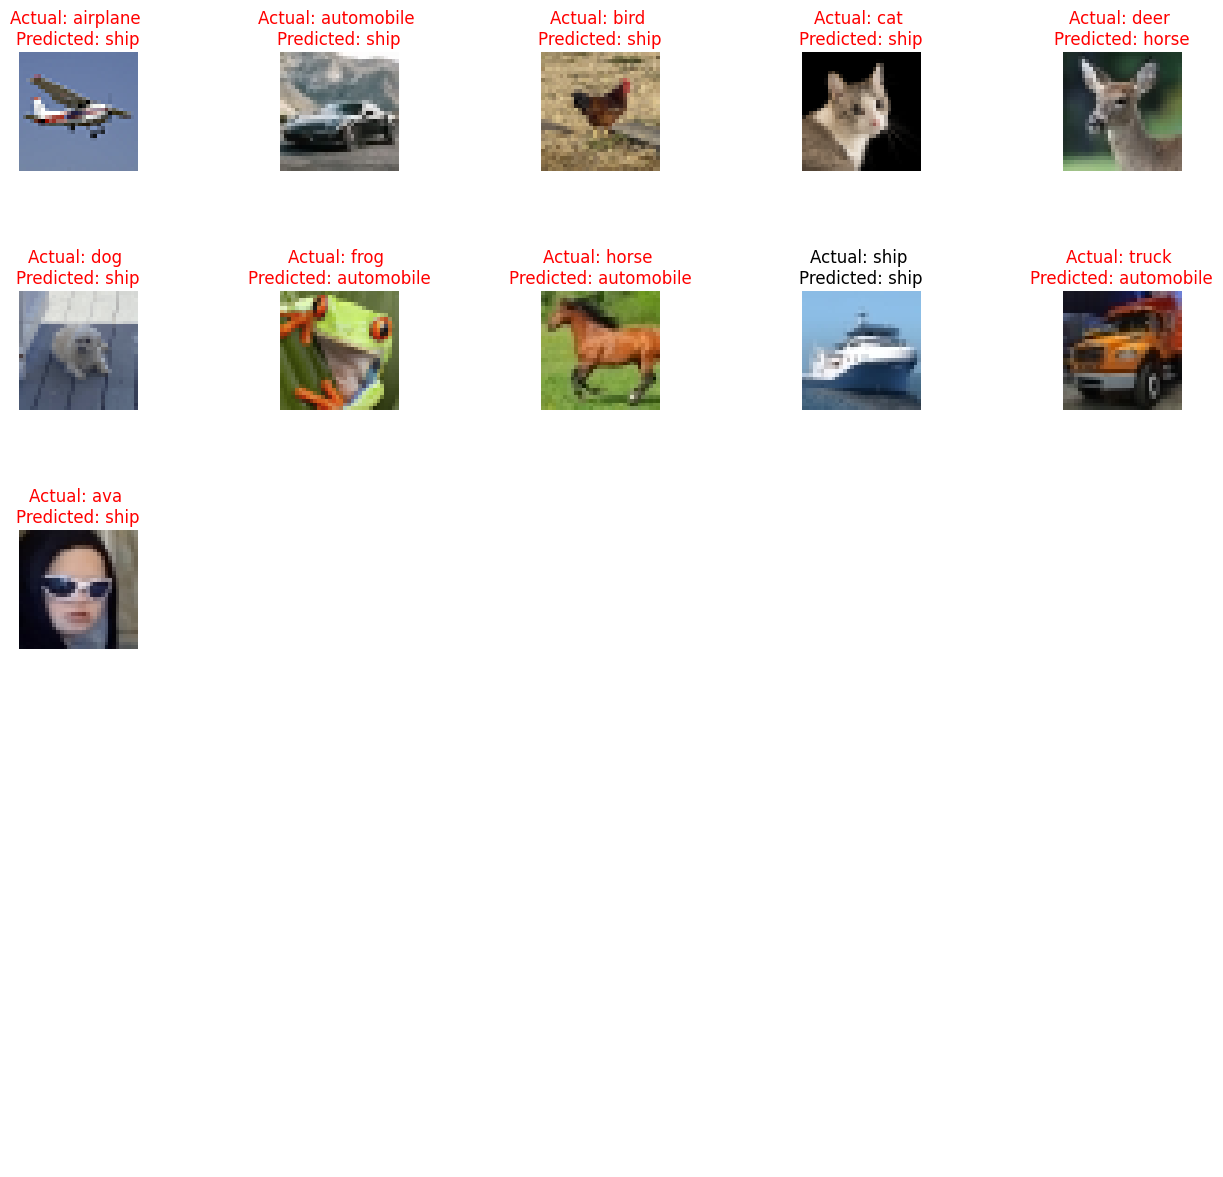

In [31]:
from PIL import Image
import numpy as np
from numpy import asarray


# don't forget ava
num_images = len(class_names) + 1
# num_images = len(class_names)

# create an empty numpy array with our dimensions
images = np.empty(shape=(num_images, 32, 32, 3), dtype='uint8')
labels = np.empty(shape=(num_images, 1), dtype='uint8')

for i, name in enumerate(class_names):

    image_name = f'moreTrainingImages/{name}.png'
    image = Image.open(image_name)
    
    # convert to three color channels
    if image.mode == 'RGBA': image = image.convert('RGB')
    
    # populate images array with a numpy array of the new image
    images[i] = asarray(image)

    # labels
    labels[i] = i

# don't forget ava
image_name = f'moreTrainingImages/ava.png'
image = Image.open(image_name)
if image.mode == 'RGBA': image = image.convert('RGB')
images[10] = asarray(image)
labels[num_images - 1] = 0

# ==================================================

# Making the Predictions
pred = model.predict(images)
pred_classes = np.argmax(pred, axis=1)

# Plotting the Actual vs. Predicted results
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):

    if i > num_images - 1:
        axes[i].axis('off')
        continue

    # displaying image to the axis canvas
    axes[i].imshow(images[i])

    # don't forget ava
    if i == num_images - 1:
        axes[i].set_title(f"Actual: ava \nPredicted: {class_names[int(pred_classes[i])]}", color='red')
        axes[i].axis('off')
    # other classes
    else:
        if pred_classes[i] == labels[i]:
            axes[i].set_title(f"Actual: {class_names[int(labels[i])]} \nPredicted: {class_names[int(pred_classes[i])]}")

        else:
            axes[i].set_title(f"Actual: {class_names[int(labels[i])]} \nPredicted: {class_names[int(pred_classes[i])]}", color='red')
        
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1.2)

# scores = model.evaluate(images, labels)             # Testing
# print(scores)